<a href="https://colab.research.google.com/github/Swastik0407/eda-projects/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA Overview & Business Impact

This Exploratory Data Analysis (EDA) delves into sales data to uncover critical insights regarding revenue drivers, customer value, and overall business performance. By analyzing customer, product, order, and time-based metrics, this notebook transforms raw sales data into actionable business intelligence.

**Purpose:**
This EDA establishes a robust foundation for strategic decision-making, feature engineering, and future sales forecasting by providing a clear understanding of current sales dynamics.

**Key Business Questions Addressed:**

*   Which products are the primary revenue generators, and which contribute least?
*   Which customers are most valuable and contribute significantly to overall sales?
*   How does sales performance evolve over time, and are there noticeable trends or seasonality?
*   What is the overall distribution of revenue across customers, highlighting dependency and potential?
*   Where should the business strategically focus to maximize growth and profitability?


# DATA UNDERSTANDING

In [2]:
from google.colab import files

uploaded = files.upload()


Saving revenue_per_product.csv to revenue_per_product.csv


In [3]:
import pandas as pd
df_product = pd.read_csv("revenue_per_product.csv")

In [ ]:
df_product

In [4]:
from google.colab import files

uploaded = files.upload()

Saving revenue_per_customer.csv to revenue_per_customer.csv


In [5]:
import pandas as pd
df_customer = pd.read_csv("revenue_per_customer.csv")

In [ ]:
df_customer

,customer_id,customer_name,total_revenue
0,1,Acme Corp,10050.0
1,2,Beta LLC,5625.0
2,5,Epsilon Ltd,2920.0
3,6,Zeta Solutions,1580.0
4,9,Iota Systems,1400.0
5,3,Gamma Inc,1374.0
6,7,Eta Traders,1300.0
7,10,Kappa Tech,970.0
8,8,Theta Enterprises,960.0
9,4,Delta Co,625.0


In [6]:
from google.colab import files

uploaded = files.upload()

Saving categorywise performance.csv to categorywise performance.csv


In [7]:
import pandas as pd
df_category = pd.read_csv("categorywise performance.csv")

In [8]:
from google.colab import files

uploaded = files.upload()

Saving orderTrend_monthly.csv to orderTrend_monthly.csv


In [9]:
import pandas as pd
df_trend = pd.read_csv("orderTrend_monthly.csv")

In [ ]:
df_trend

,revenue_monthly,total_revenue
0,2023-01,3375.0
1,2023-02,874.0
2,2023-03,3480.0
3,2023-04,710.0
4,2023-05,2250.0
5,2023-06,649.0
6,2023-07,830.0
7,2023-08,4489.0
8,2023-09,1360.0
9,2023-10,2346.0


In [ ]:
df_customer.shape

(10, 3)

In [ ]:
df_product.shape

(9, 4)

In [ ]:
df_category.shape

(4, 2)

In [ ]:
df_trend.shape

(12, 2)

In [ ]:
df_trend.info()
df_customer.info()
df_product.info()
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   revenue_monthly  12 non-null     object 
 1   total_revenue    12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 324.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    10 non-null     int64  
 1   customer_name  10 non-null     object 
 2   total_revenue  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     9 non-null      int64  
 1   product_name   9 non-null      o

In [ ]:
df_product["total_revenue"].sum()


np.float64(24704.0)

In [ ]:
df_customer['total_revenue'].sum()

np.float64(26804.0)

In [ ]:
df_category['category_revenue'].sum()

np.float64(26804.0)

In [ ]:
df_trend['total_revenue'].sum()

np.float64(26804.0)

In [ ]:
df_product.columns = ['product_id', 'product_name', 'category', 'total_revenue']
df_customer.columns = ['customer_id', 'customer_name', 'total_revenue']
df_category.columns = ['category', 'total_revenue']
df_trend.columns = ['month', 'total_revenue']


# Revenue Concentration across Products

In [28]:
df_product_sorted = df_product.sort_values(by='total_revenue', ascending=False)

df_product_sorted['revenue_pct'] = (
    df_product_sorted['total_revenue'] /
    df_product_sorted['total_revenue'].sum()
)

df_product_sorted['cumulative_revenue_pct'] = (
    df_product_sorted['revenue_pct'].cumsum()
)

df_product_sorted.head(10)


,product_id,product_name,category,total_revenue,revenue_pct,cumulative_revenue_pct
0,1,Laptop X,Electronics,10800.0,0.437176,0.437176
1,2,Smartphone Y,Electronics,7200.0,0.291451,0.728627
5,6,"Monitor 24"",Electronics,2100.00\n7,Office Desk""",Furniture,1750.0,0.070839,0.799466
2,3,Desk Chair,Furniture,1500.0,0.060719,0.860185
6,8,Headphones,Electronics,1200.0,0.048575,0.908760
7,9,Coffee Machine,Appliances,1000.0,0.040479,0.949239
8,10,Printer,Electronics,900.0,0.036431,0.985670
4,5,Pen Set,Stationery,204.0,0.008258,0.993928
3,4,Notebook,Stationery,150.0,0.006072,1.000000


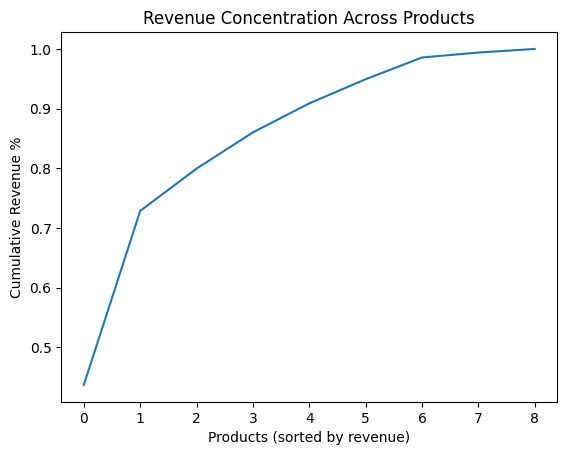

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_product_sorted['cumulative_revenue_pct'].values)
plt.xlabel('Products (sorted by revenue)')
plt.ylabel('Cumulative Revenue %')
plt.title('Revenue Concentration Across Products')
plt.show()


##**Revenue Concentration Insight**



Revenue is highly concentrated among a small number of products. The top two products alone contribute nearly 73% of total revenue, indicating a strong dependency risk. While these products drive profitability, lower-performing products contribute marginally and may require portfolio rationalization or strategic repositioning.

# Customer Lifetime Value

In [30]:
df_customer= df_customer.rename(
    columns={'total_revenue':'clv'}
)

In [31]:
df_customer

,customer_id,customer_name,clv
0,1,Acme Corp,10050.0
1,2,Beta LLC,5625.0
2,5,Epsilon Ltd,2920.0
3,6,Zeta Solutions,1580.0
4,9,Iota Systems,1400.0
5,3,Gamma Inc,1374.0
6,7,Eta Traders,1300.0
7,10,Kappa Tech,970.0
8,8,Theta Enterprises,960.0
9,4,Delta Co,625.0


Rank customer by clv


In [32]:
df_customer_sorted= df_customer.sort_values(
    by="clv",
    ascending=False
).reset_index(drop=True)

In [ ]:
df_customer_sorted

,customer_id,customer_name,clv,clv_pct,cumulative_clv_pct
0,1,Acme Corp,10050.0,0.374944,0.374944
1,2,Beta LLC,5625.0,0.209857,0.584801
2,5,Epsilon Ltd,2920.0,0.108939,0.693740
3,6,Zeta Solutions,1580.0,0.058946,0.752686
4,9,Iota Systems,1400.0,0.052231,0.804917
5,3,Gamma Inc,1374.0,0.051261,0.856178
6,7,Eta Traders,1300.0,0.048500,0.904678
7,10,Kappa Tech,970.0,0.036189,0.940867
8,8,Theta Enterprises,960.0,0.035816,0.976683
9,4,Delta Co,625.0,0.023317,1.000000


CLV percentage contribution

In [33]:
total_clv=df_customer["clv"].sum()
df_customer_sorted['clv_pct']= df_customer_sorted['clv']/ total_clv

df_customer_sorted['cumulative_clv_pct'] = df_customer_sorted['clv_pct'].cumsum()
df_customer_sorted.head()

,customer_id,customer_name,clv,clv_pct,cumulative_clv_pct
0,1,Acme Corp,10050.0,0.374944,0.374944
1,2,Beta LLC,5625.0,0.209857,0.584801
2,5,Epsilon Ltd,2920.0,0.108939,0.693740
3,6,Zeta Solutions,1580.0,0.058946,0.752686
4,9,Iota Systems,1400.0,0.052231,0.804917


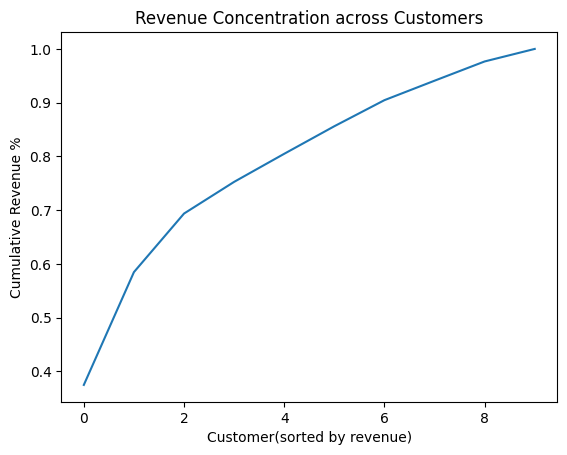

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df_customer["cumulative_clv_pct"].values)
plt.xlabel('Customer(sorted by revenue)')
plt.ylabel('Cumulative Revenue %')
plt.title("Revenue Concentration across Customers")
plt.show()

##**Revenue concentration insignts**

A small number of customers (top 5) generate ~80% of revenue, highlighting the need to focus on high-value accounts for retention and growth, while also exploring opportunities to increase revenue from mid-tier customers to reduce dependency risk. The long tail of smaller customers contributes relatively little individually, but collectively represents a potential growth segment that could be nurtured with targeted campaigns or upselling strategies. This distribution also suggests that any loss of a top customer could significantly impact overall revenue, emphasizing the importance of customer relationship management and risk mitigation.

# DATA VISUALIZATION

##Revenue Distribution

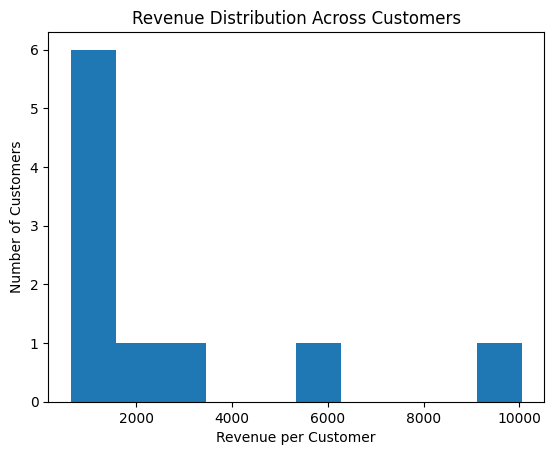

In [16]:
import matplotlib.pyplot as plt


plt.figure()
plt.hist(df_customer['total_revenue'], bins=10)
plt.xlabel('Revenue per Customer')
plt.ylabel('Number of Customers')
plt.title('Revenue Distribution Across Customers')
plt.show()


##Conclusion from the Revenue Distribution Across Customers

Revenue is highly right-skewed.

Most customers generate low to moderate revenue, clustered on the left side of the graph.

A very small number of customers generate exceptionally high revenue, creating a long tail on the right.

---
##Business Interpretation

The business is heavily dependent on a few high-value customers.

Losing even one top customer could cause a significant revenue drop.

While many customers exist, their individual contribution is small, suggesting untapped potential through upselling or cross-selling.




##Revenue Trend

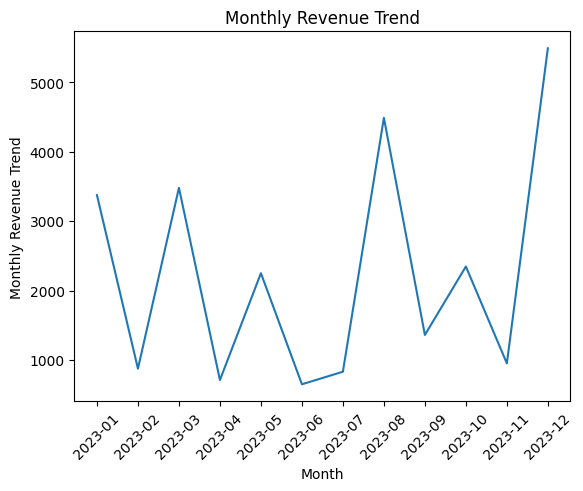

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_trend['revenue_monthly'], df_trend["total_revenue"])
plt.xlabel("Month")
plt.ylabel("Monthly Revenue Trend")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()

##Conclusion from the Monthly Revenue Trend

Monthly revenue shows significant fluctuations, indicating high volatility rather than steady growth.

There are multiple sharp peaks and drops, suggesting revenue is influenced by sporadic high-value sales or seasonal effects.

The highest revenue occurs in the final month, indicating a strong end-of-period performance.

There is no smooth upward or downward trend across the year; performance varies month to month

---

##Business Interpretation

Sales performance is inconsistent across months, with revenue driven by occasional spikes rather than sustained growth. This suggests reliance on specific events, customers, or product launches rather than a stable recurring revenue base.

##Top Products by Revenue

In [21]:
top_products = df_product.sort_values(
    by='total_revenue',
    ascending=False
).head(5)


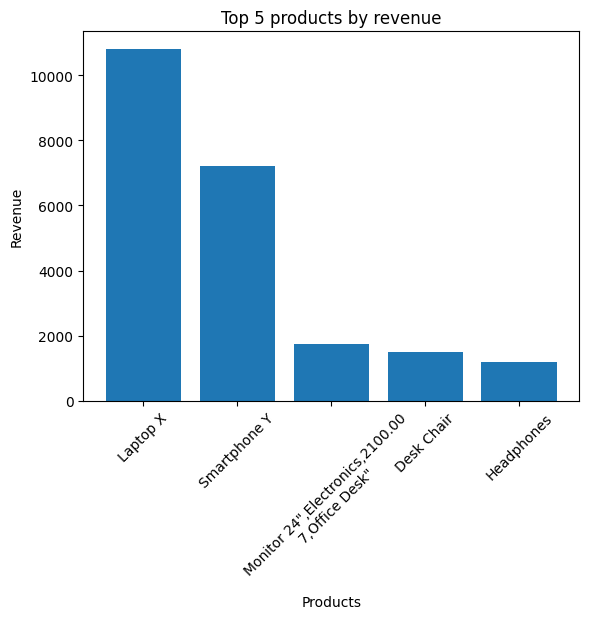

In [23]:
plt.figure()
plt.bar(top_products['product_name'], top_products['total_revenue'])
plt.xlabel("Products")
plt.ylabel('Revenue')
plt.title('Top 5 products by revenue')
plt.xticks(rotation=45)
plt.show()

##Conclusion from the Graph

The graph shows that Laptop X is the highest revenue-generating product, followed by Smartphone Y. Together, these two products contribute a major share of total revenue. The remaining products—Monitor, Desk Chair, and Headphones—generate significantly lower revenue, indicating a steep drop after the top two products.

---

##Business Interpretation

The revenue distribution suggests that the business is heavily dependent on a small number of high-performing products, especially Laptop X. This highlights the importance of maintaining inventory availability and focused marketing for these top products. Lower-revenue products can be leveraged through bundling, cross-selling, or targeted promotions to improve their contribution without increasing acquisition costs.

##Top Customers / Pareto Analysis

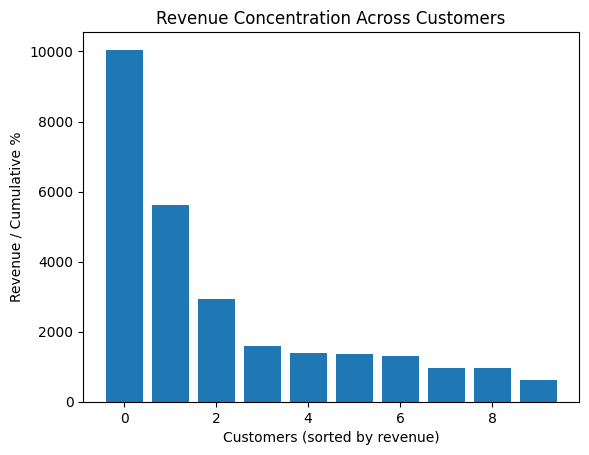

In [35]:
plt.figure()
plt.bar(
    range(len(df_customer_sorted)),
    df_customer_sorted['clv']
)

plt.xlabel('Customers (sorted by revenue)')
plt.ylabel('Revenue / Cumulative %')
plt.title('Revenue Concentration Across Customers')
plt.show()


##Overall EDA Conclusions & Business Implications:
**Product Revenue Concentration:**

Revenue is highly concentrated among a small number of products. The top two products (Laptop X, Smartphone Y) contribute nearly 73% of total revenue, indicating a strong dependency risk. While these products drive profitability, lower-performing products contribute marginally and may require portfolio rationalization or strategic repositioning.


**Customer Lifetime Value & Concentration:**

A small number of customers (the top 5) generate approximately 80% of revenue. This highlights the critical need to focus on high-value accounts for retention and growth. It also suggests exploring opportunities to increase revenue from mid-tier customers to reduce dependency risk. The long tail of smaller customers represents potential growth through targeted campaigns or upselling.


**Revenue Distribution Across Customers:**

The revenue distribution is highly right-skewed, meaning most customers generate low to moderate revenue, while a very small number contribute exceptionally high revenue. This heavy dependence on a few high-value customers means the loss of even one could significantly impact revenue. There is untapped potential in smaller customers through upselling or cross-selling.


**Monthly Revenue Trend:**

Monthly revenue shows significant fluctuations and high volatility, rather than steady growth. There are sharp peaks and drops, suggesting influence from sporadic high-value sales or seasonal effects, with the highest revenue occurring in the final month. This indicates sales performance is inconsistent, driven by occasional spikes rather than sustained, stable growth.


**Top Products by Revenue (Specifics):**

Laptop X is the highest revenue-generating product, followed by Smartphone Y, together contributing a major share. Other products like Monitor, Desk Chair, and Headphones generate significantly lower revenue. This confirms heavy dependence on a few high-performing products, emphasizing the importance of inventory, focused marketing, and leveraging lower-revenue products through bundling or targeted promotions.